# Capstone Project - Car Accident Prediction (Week 1)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [My Notes](#notes)
* [Introduction: Business Problem](#introduction)
* [Data](#data)

---

## My Notes <a name="notes"></a>

#### Problem:

Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. 

As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. 

__Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.__

#### Data Selection:

For this week, your main task is to decide whether you want to use the shared data or find your own dataset. In case, you choose to find your own dataset from the resources that are suggested in Week-1 video, your dataset should meet the following criteria: 

1. __The target or label columns should be accident "severity" in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact.__ 
2. The machine learning model should be able to predict accident "severity"
3. To build a good model, the dataset should be rich and contain many observations (rows) and various attributes (columns)

#### Possible Data Sources:

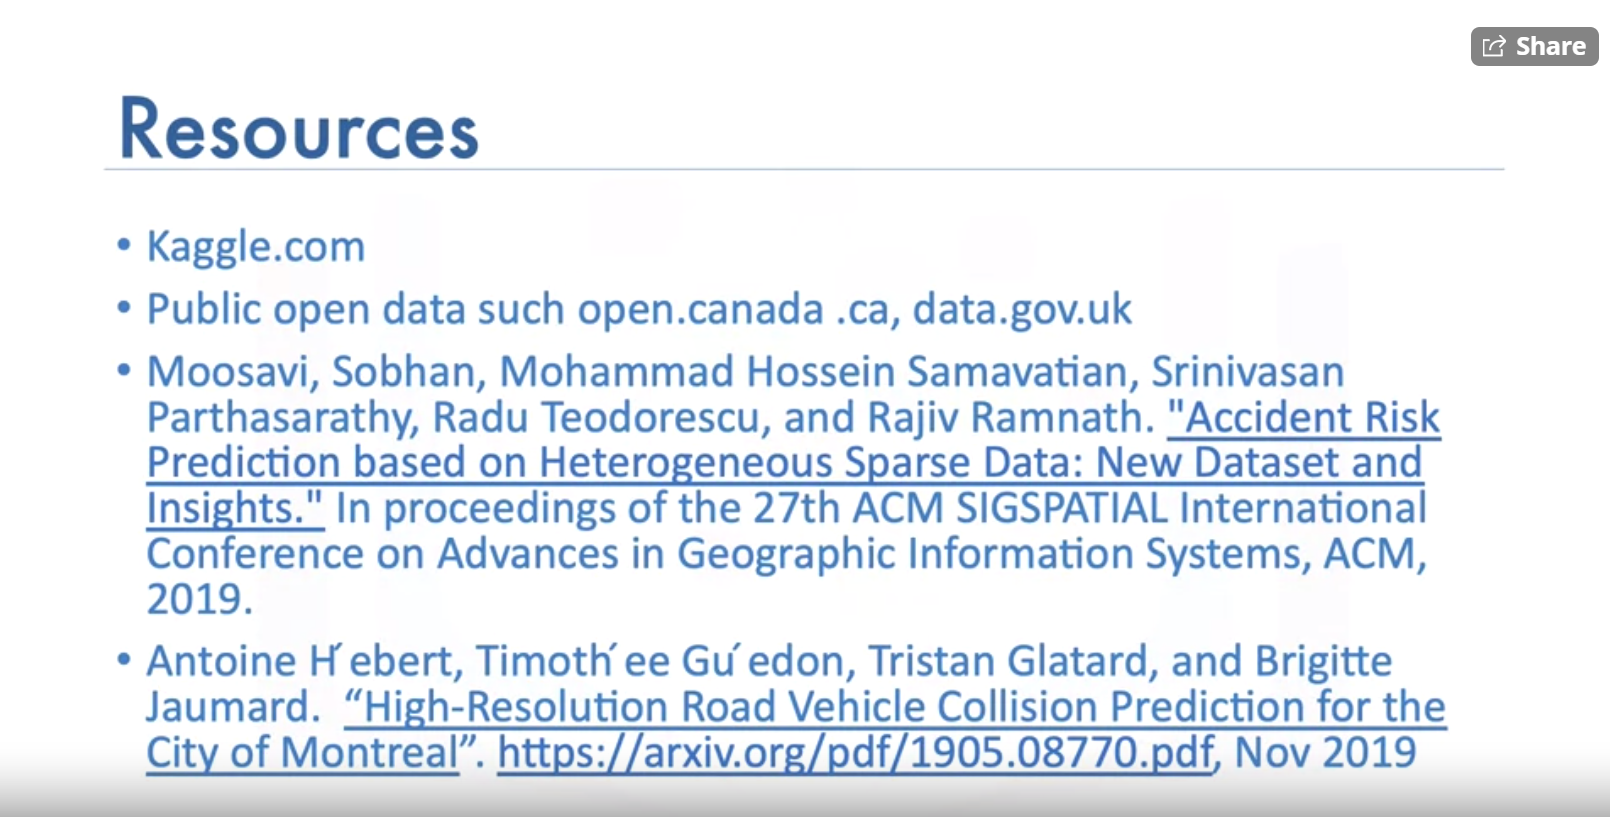

---

## Introduction: Business Problem <a name="introduction"></a>

_The initial phase is to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives._

---

## Data <a name="data"></a>

_In this phase, you need to collect or extract the dataset from various sources such as csv file or SQL database. Then, you need to determine the attributes (columns) that you will use to train your machine learning model. Also, you will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on._